# **KNN**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/malicious_phish.csv")

In [ ]:
df

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [ ]:
df.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


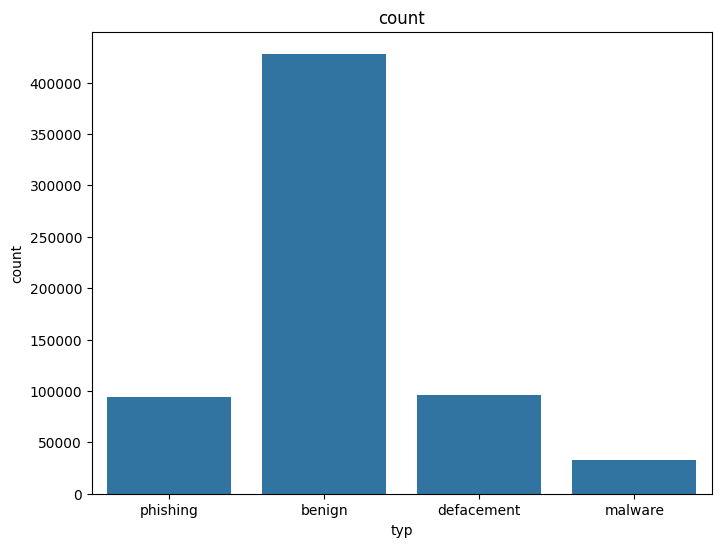

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="type",data=df)
plt.title("count")
plt.xlabel("typ")
plt.ylabel("count")
plt.show()

# **Feature Engineering**

In [ ]:
def extract_features(url):
    features = {}
    features['url_length'] = len(url)
    features['num_digits'] = sum(c.isdigit() for c in url)
    features['num_letters'] = sum(c.isalpha() for c in url)
    features['num_special_chars'] = sum(not c.isalnum() for c in url)
    features['num_subdomains'] = url.count('.')
    features['num_query_params'] = url.count('?')
    return features

# Apply feature extraction to the dataset
features = df['url'].apply(extract_features)
features_df = pd.DataFrame(list(features))

# Combine features with target variable
df = pd.concat([features_df, df['type']], axis=1)
df.head()


,url_length,num_digits,num_letters,num_special_chars,num_subdomains,num_query_params,type
0,16,0,13,3,2,0,phishing
1,35,1,29,5,2,0,benign
2,31,1,25,5,2,0,benign
3,88,7,63,18,3,1,defacement
4,235,22,199,14,2,1,defacement


# **EDA -  Visualization of Feature Relationships**

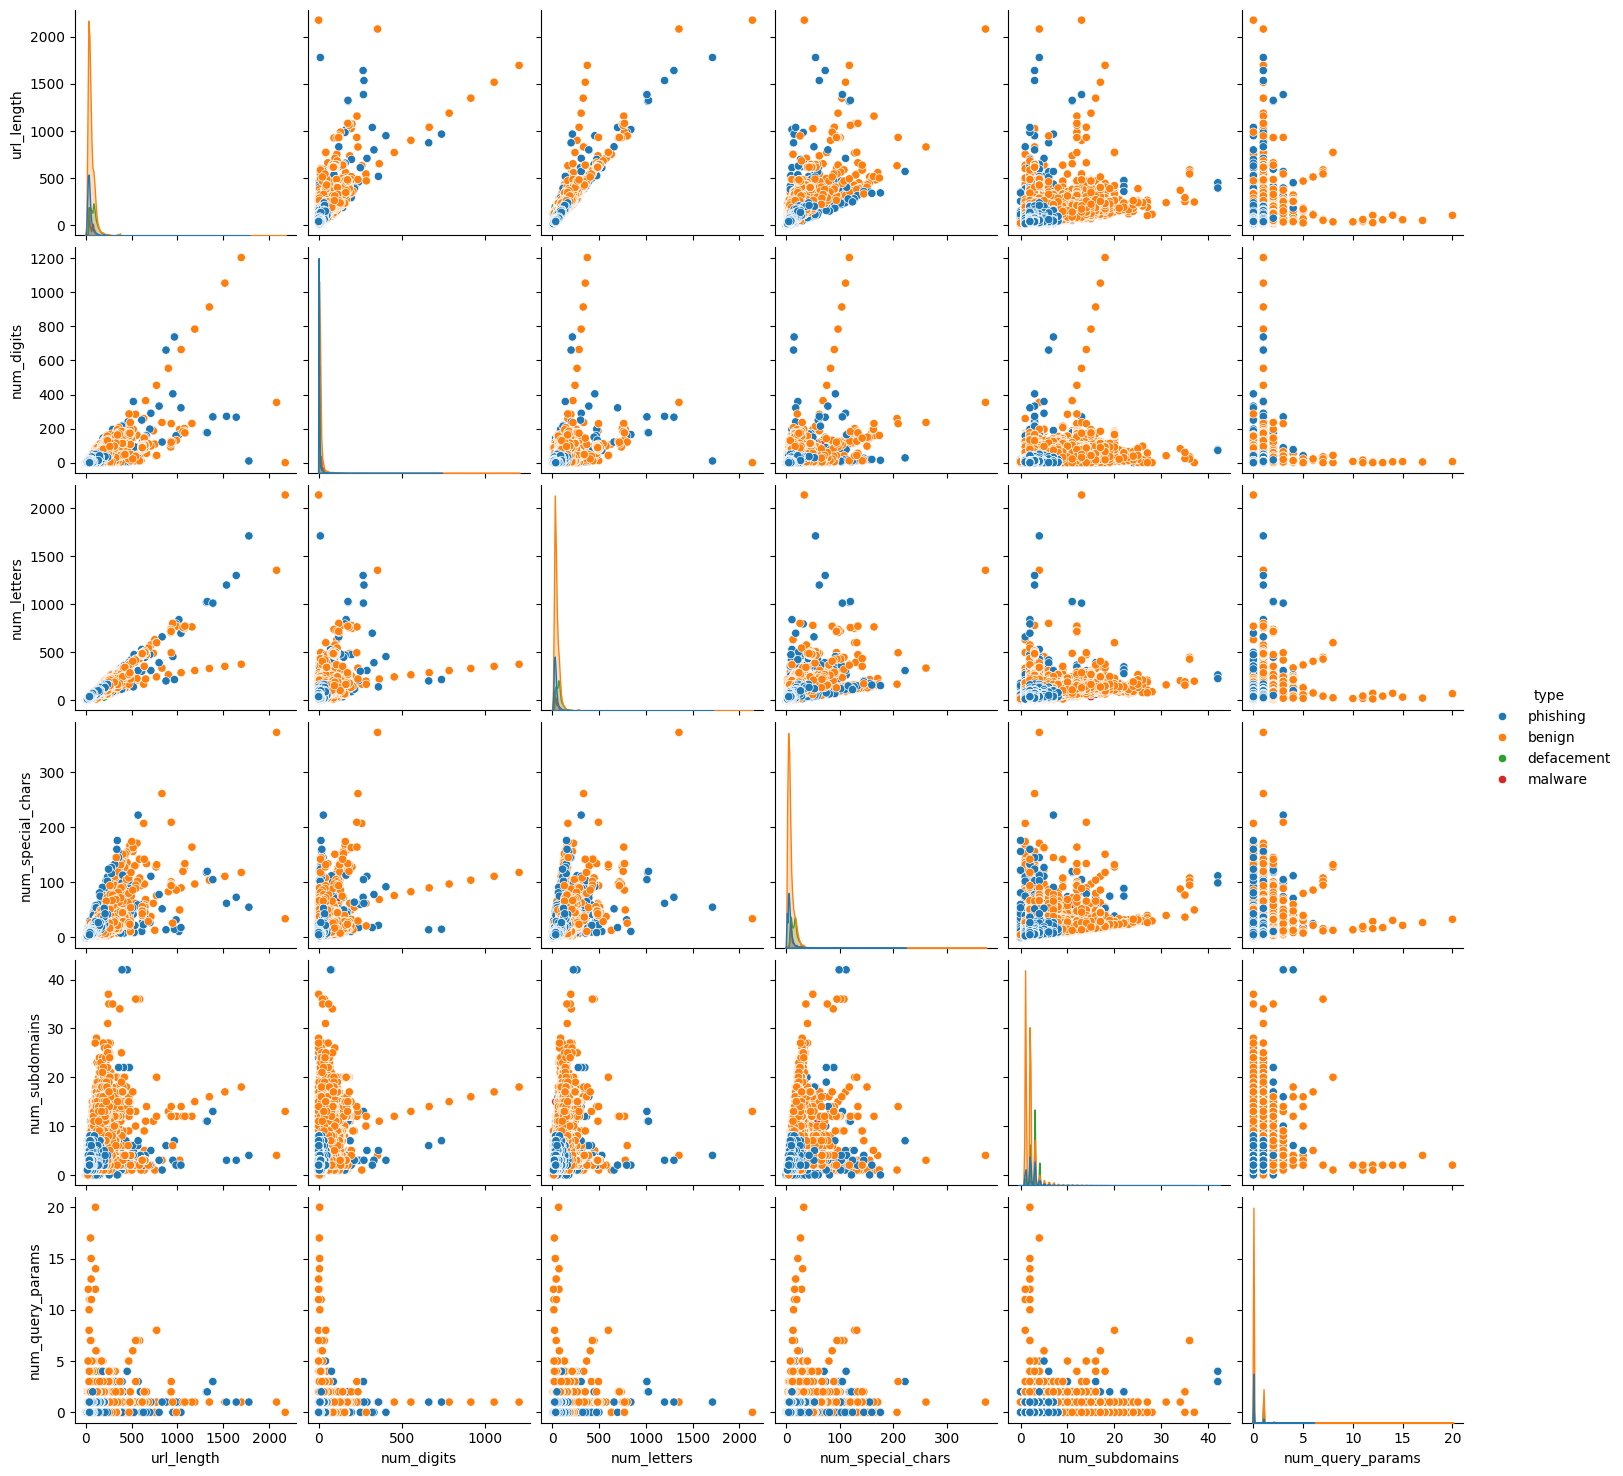

In [ ]:
sns.pairplot(df, hue='type')
plt.show()

# **Building and Evaluating**

In [ ]:
# Extract features and labels
X = df[['url_length', 'num_digits', 'num_letters', 'num_special_chars', 'num_subdomains', 'num_query_params']].values
y = df['type']

# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, target_names=le.classes_)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_str)

Accuracy: 0.8323773984751112
Classification Report:
              precision    recall  f1-score   support

      benign       0.87      0.92      0.89     85778
  defacement       0.76      0.77      0.77     19104
     malware       0.89      0.84      0.86      6521
    phishing       0.67      0.49      0.57     18836

    accuracy                           0.83    130239
   macro avg       0.80      0.76      0.77    130239
weighted avg       0.83      0.83      0.83    130239



In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate True Positive Rates for each category
conf_matrix = confusion_matrix(y_test, y_pred)
tpr = conf_matrix.diagonal() / conf_matrix.sum(axis=1)

# Create a DataFrame to display TPR
tpr_df = pd.DataFrame({'Class': le.classes_, 'True Positive Rate': tpr})
print("\nTrue Positive Rates for Each Category:")
print(tpr_df)


True Positive Rates for Each Category:
        Class  True Positive Rate
0      benign            0.919641
1  defacement            0.774340
2     malware            0.835148
3    phishing            0.492886
